In [1]:
###data processing assoicated package
import pickle
import pprint
import gc 
import datetime
import numpy as np
###drawing package
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob
import netCDF4 as nc
import pickle
import csv
import cv2
import math
import numpy.ma as ma
from skimage import filters
import matplotlib.patches as patches

In [2]:
print('ext shape')
x = np.arange(85.0025,205.0025,0.005)
y = np.arange(-59.9975,60.0025,0.005)
#print(x.shape)
#print(y.shape)
#local_lon=x[6500:10700]
#local_lat=y[15900:20100]
local_lon=x[6700:8700]
local_lat=y[16200:17200]

ext shape


In [3]:
ddate='08'

In [50]:
with open('corr_band_202002080000.pkl', 'rb') as f:
          band_data=pickle.load(f)

In [51]:
print(band_data.shape)

(3, 1000, 2000)


In [52]:
rgb01 = (band_data[0,:,:]/100)**(1/2)
rgb02 = (band_data[1,:,:]/100)**(1/2)
rgb03 = (band_data[2,:,:]/100)**(1/2)

In [53]:
data = np.array([rgb01,rgb02,rgb03])
aa=np.zeros((1000,2000,3))
aa[:,:,0]=data[2,:,:]
aa[:,:,1]=data[1,:,:]
aa[:,:,2]=data[0,:,:]
mesh=aa[:,:-1,:]
color_t=mesh.reshape((mesh.shape[0] * mesh.shape[1]),3)
#print(np.min(band011))
#print(band022[band022<0])
#print(np.min(band033))
color_t[color_t>1] = 1

In [54]:
with open('region_mask.pkl', 'rb') as f:
    region_mask=pickle.load(f)

In [55]:
tt_cor_band033=band_data[2,:,100:901]
t_lon=local_lon[100:901]
t_lat=local_lat

In [56]:
thesh1=filters.threshold_otsu(tt_cor_band033)
print(thesh1)

34.4168960750103


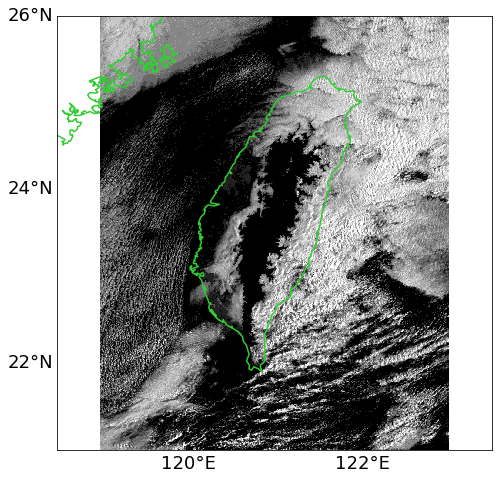

In [57]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
cmap2 = cm.get_cmap("Greys_r",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
test=ma.masked_where(tt_cor_band033<0,tt_cor_band033)
m.pcolormesh(t_lon,t_lat,test,cmap=cmap2,vmin=0,vmax=100)

In [58]:
tt_cor_band033[tt_cor_band033>30]=100
edge = filters.sobel(tt_cor_band033)
thesh=filters.threshold_otsu(edge)
print(thesh)
print(np.max(edge))

24.077434433705214
77.53236748463566


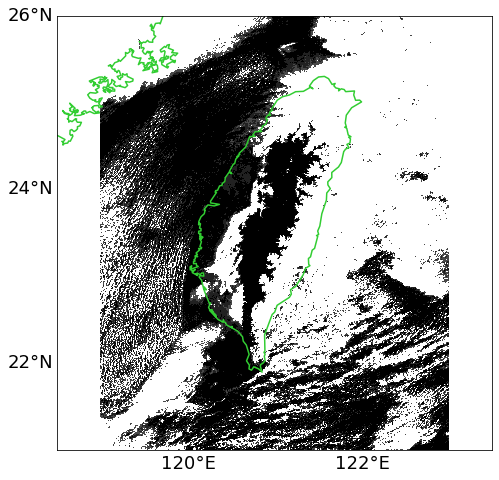

In [59]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
cmap2 = cm.get_cmap("Greys_r",lut=10)
cmap2.set_under("k")
cmap2.set_over("w")
test=ma.masked_where(tt_cor_band033<0,tt_cor_band033)
m.pcolormesh(t_lon,t_lat,test,cmap=cmap2,vmin=0,vmax=100)

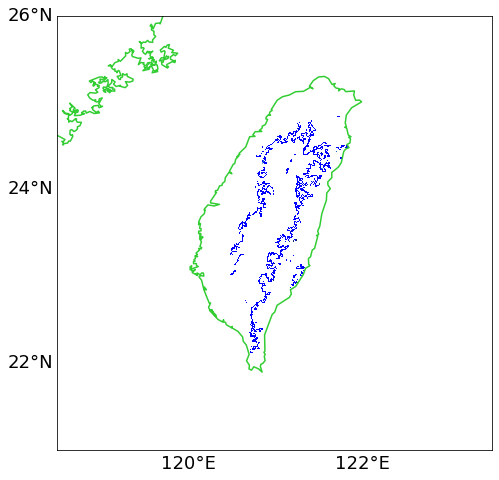

In [124]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("b")
#test=ma.masked_where(edge<thesh,edge)
ttest=ma.masked_where(topo1<500,edge)
#test=edge
m.pcolormesh(t_lon,t_lat,ttest,cmap=cmap2,vmin=24,vmax=25)

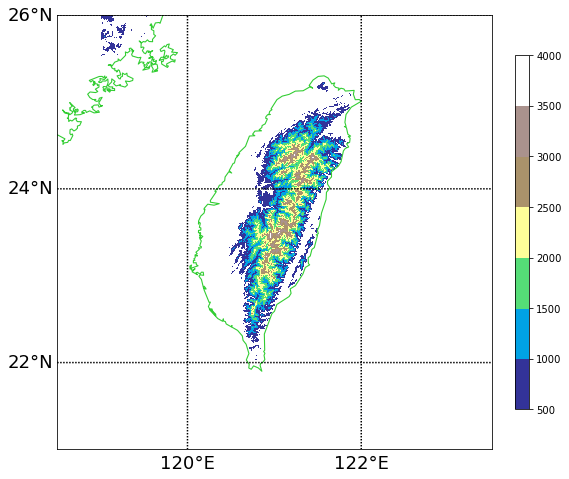

In [26]:
##draw tbb and CloudSat track
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.1,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

#print(x.shape)
cmap2 = cm.get_cmap("terrain",lut=7)
cmap2.set_under("w")
#cmap2.set_over("k")
#r_tri_tbb_region = tri_tbb_region[::-1]

#m.pcolormesh(llon,llat,aa[0:18001:100,0:14401:100],cmap=cmap2,vmin=0,vmax=3800)#,cmap=cmap2,vmin=200,vmax=300)
m.pcolormesh(t_lon,t_lat,topo1,cmap=cmap2,vmin=500,vmax=4000)#,cmap=cmap2,vmin=200,vmax=300)
#plt.title('Himawari Band13  '+str(year)+'/'+str(mon)+'/'+str(day)+' UTC '+str(hr)+':' +str(mn)+ '',fontsize=18)
plt.colorbar(fraction=0.03,aspect=25)
plt.tight_layout()

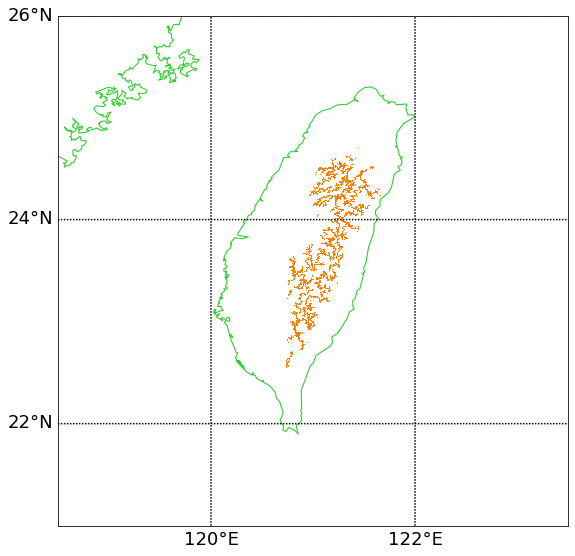

In [95]:

fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.1,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=1.5, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=1.5, color='k', fontsize=18)

#print(x.shape)
cmap2 = cm.get_cmap("Wistia",lut=1)
cmap2.set_under("w")
cmap2.set_over("w")
#r_tri_tbb_region = tri_tbb_region[::-1]

#m.pcolormesh(llon,llat,aa[0:18001:100,0:14401:100],cmap=cmap2,vmin=0,vmax=3800)#,cmap=cmap2,vmin=200,vmax=300)
m.pcolormesh(t_lon,t_lat,topo1,cmap=cmap2,vmin=2000,vmax=2500)#,cmap=cmap2,vmin=200,vmax=300)
#plt.title('Himawari Band13  '+str(year)+'/'+str(mon)+'/'+str(day)+' UTC '+str(hr)+':' +str(mn)+ '',fontsize=18)
#plt.colorbar(fraction=0.03,aspect=25)
plt.tight_layout()

In [112]:
top=2500
bot=2000
    #print(top,bot)
topo[topo>top]=0
topo[topo<=bot]=0
region_edge=np.zeros((1000,801))
fog_mask=np.zeros((1000,801))
edge_mask=np.zeros((1000,801))
region_edge[100:900,170:650]=edge[100:900,170:650]
        ##### testing
edge_mask[region_edge>thesh+20]=1
test=ma.masked_where(edge_mask<0.5,edge_mask)
ttest=ma.masked_where(topo1<500,test)
        #print(np.sum(ttest))
ttt=ma.masked_where(topo<0.5,ttest)

Text(0.5, 1.0, '2000~2500m fog edge detection')

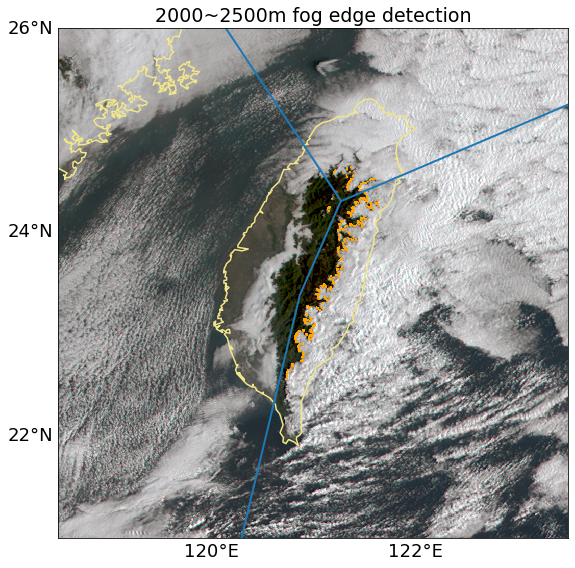

In [113]:
fig = plt.figure(figsize=(8,8))
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
m.pcolormesh(local_lon,local_lat,aa[:,:,2],color=color_t)

tttt1=ma.masked_where(ttt<0.1,ttt)
#m.pcolormesh(t_lon,t_lat,ttest*100,cmap=cmap2,vmin=thesh,vmax=thesh+10)
cmap1 = cm.get_cmap("Blues",lut=5)
cmap1.set_over("orange")
m.pcolormesh(t_lon,t_lat,tttt1*100,cmap=cmap1,vmin=20,vmax=90)
m.plot(xx1,yy1,color='tab:blue',linewidth=2)
m.plot(xx2,yy2,color='tab:blue',linewidth=2)
#m.pcolormesh(t_lon,t_lat,aaa,cmap=cmap2,vmin=20,vmax=90)
plt.tight_layout()
plt.title('2000~2500m fog edge detection',fontsize=19)

Text(0.5, 1.0, '500~1000m fog edge detection')

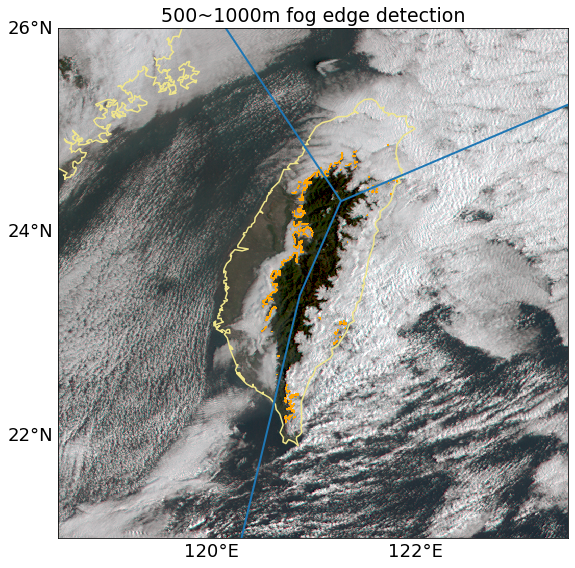

In [109]:
top=1000
bot=500
    #print(top,bot)
topo[topo>top]=0
topo[topo<=bot]=0
region_edge=np.zeros((1000,801))
fog_mask=np.zeros((1000,801))
edge_mask=np.zeros((1000,801))
region_edge[100:900,170:650]=edge[100:900,170:650]
        ##### testing
edge_mask[region_edge>thesh+20]=1
test=ma.masked_where(edge_mask<0.5,edge_mask)
ttest=ma.masked_where(topo1<500,test)
        #print(np.sum(ttest))
ttt=ma.masked_where(topo<0.5,ttest)
fig = plt.figure(figsize=(8,8))
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
m.pcolormesh(local_lon,local_lat,aa[:,:,2],color=color_t)

tttt1=ma.masked_where(ttt<0.1,ttt)
#m.pcolormesh(t_lon,t_lat,ttest*100,cmap=cmap2,vmin=thesh,vmax=thesh+10)
cmap1 = cm.get_cmap("Blues",lut=5)
cmap1.set_over("orange")
m.pcolormesh(t_lon,t_lat,tttt1*100,cmap=cmap1,vmin=20,vmax=90)
m.plot(xx1,yy1,color='tab:blue',linewidth=2)
m.plot(xx2,yy2,color='tab:blue',linewidth=2)
#m.pcolormesh(t_lon,t_lat,aaa,cmap=cmap2,vmin=20,vmax=90)
plt.tight_layout()
plt.title('500~1000m fog edge detection',fontsize=19)

In [27]:
with open('topo_regrid_500m.pkl', 'rb') as f:
    topo1 = pickle.load(f)

In [34]:
fog1=0
fog2=0
fog3=0
ttt1=np.zeros((1000,801))
ttt2=np.zeros((1000,801))
ttt3=np.zeros((1000,801))
#del ttt1,ttt2,ttt3
for step in range(0,7):
    with open('topo_regrid_500m.pkl', 'rb') as f:
        topo = pickle.load(f)

    top=(step+2)*500
    bot=(step+1)*500
    #print(top,bot)
    topo[topo>top]=0
    topo[topo<=bot]=0
    for re in range(0,3):
        region_edge=np.zeros((1000,801))
        fog_mask=np.zeros((1000,801))
        edge_mask=np.zeros((1000,801))
        region_edge[100:900,170:650]=edge[100:900,170:650]
        ##### testing
        edge_mask[region_edge>thesh+20]=1
        edge_mask[region_mask<(re+1)*10]=0
        edge_mask[region_mask>(re+1)*10]=0
        test=ma.masked_where(edge_mask<0.9,edge_mask)
        ttest=ma.masked_where(topo1<500,test)
        #print(np.sum(ttest))
        ttt=ma.masked_where(topo<0.5,ttest)
        #print(np.sum(ttt))
        if re == 0 and np.sum(ttt)/np.sum(ttest)>=fog1:
            fog1=np.sum(ttt)/np.sum(ttest)
            top1=top
            bot1=bot
            ttt1=ttt
        if re == 1 and np.sum(ttt)/np.sum(ttest)>=fog2:
            fog2=np.sum(ttt)/np.sum(ttest)
            top2=top
            bot2=bot
            ttt2=ttt
        if re == 2 and np.sum(ttt)/np.sum(ttest)>=fog3:
            fog3=np.sum(ttt)/np.sum(ttest)
            top3=top
            bot3=bot
            ttt3=ttt
        #if re == 0:
        #    print(top)
        #    print(np.sum(ttt)/np.sum(ttest))
        #    print(bot)

In [35]:
print(fog1,fog2,fog3)
print(top1,top2,top3)
print(bot1,bot2,bot3)

0.3158671586715867 0.36163522012578614 0.8937621832358674
2500 2000 1000
2000 1500 500


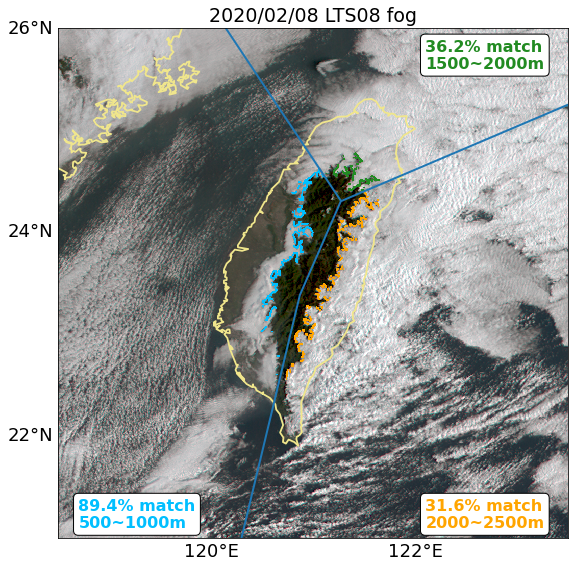

In [36]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.8,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
m.pcolormesh(local_lon,local_lat,aa[:,:,2],color=color_t)
#m.pcolormesh(tt_lon,tt_lat,aa[:,:,2],color=color_t)
cmap2 = cm.get_cmap("Blues",lut=5)
#cmap2.set_under("w")
cmap2.set_over("k")
tttt1=ma.masked_where(ttt1<0.1,ttt1)
tttt2=ma.masked_where(ttt2<0.1,ttt2)
tttt3=ma.masked_where(ttt3<0.1,ttt3)
#m.pcolormesh(t_lon,t_lat,ttest*100,cmap=cmap2,vmin=thesh,vmax=thesh+10)
cmap1 = cm.get_cmap("Blues",lut=5)
cmap1.set_over("orange")
m.pcolormesh(t_lon,t_lat,tttt1*100,cmap=cmap1,vmin=20,vmax=90)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_over("forestgreen")
m.pcolormesh(t_lon,t_lat,tttt2*100,cmap=cmap2,vmin=20,vmax=90)
cmap3 = cm.get_cmap("Blues",lut=5)
cmap3.set_over("deepskyblue")
m.pcolormesh(t_lon,t_lat,tttt3*100,cmap=cmap3,vmin=20,vmax=90)

#m.pcolormesh(t_lon,t_lat,region_mask,cmap=cmap2,vmin=0,vmax=35,alpha=0.05)
m.plot(xx1,yy1,color='tab:blue',linewidth=2)
m.plot(xx2,yy2,color='tab:blue',linewidth=2)
props = dict(boxstyle='round', facecolor='w', alpha=1)
#plt.text(122.1,21.3,''+str(round(fog1*100,1))+'% match\n'+str(bot1)+'~'+str(top1)+'m',color='orange',fontsize='16',fontweight='bold',bbox=props)
#### fog info
if fog1>0:
    info=''+str(round(fog1*100,1))+'% match\n'+str(bot1)+'~'+str(top1)+'m'
else:
    info=''+str(round(fog1*100,1))+'% match'
plt.text(122.1,21.1,info,color='orange',fontsize='16',fontweight='bold',bbox=props)
    #plt.text(122.2,21.1,''+str(bot1)+'~'+str(top1)+'m',color='orange',fontsize='14',fontweight='bold')
    

if fog2>0:
    info=''+str(round(fog2*100,1))+'% match\n'+str(bot2)+'~'+str(top2)+'m'
else:
    info=''+str(round(fog2*100,1))+'% match'

plt.text(122.1,25.6,info,color='forestgreen',fontsize='16',fontweight='bold',bbox=props)


if fog3>0:
    info=''+str(round(fog3*100,1))+'% match\n'+str(bot3)+'~'+str(top3)+'m'
else:
    info=''+str(round(fog3*100,1))+'% match'

plt.text(118.7,21.1,info,color='deepskyblue',fontsize='16',fontweight='bold',bbox=props)
####

plt.title('2020/02/'+ddate+' LTS08 fog',fontsize=19)
plt.tight_layout()
plt.savefig('testing_fog_truec_20200208.png',dpi=400)

In [32]:
yy1=t_lat[0:1000]
xx1=np.zeros((1000))
yy2=t_lat[660:1000]
xx2=np.zeros((340))
k=(121.2-120)/1000
for i in range(0,475):
    xx1[i]=120.3+k*i

k=(121.2-120)/550
for i in range(475,660):
    xx1[i]=120.8688+k*(i-474)
    #print(120.8688+k*(i-474))

k=(126-121)/425
kk=(126-121)/1500
for i in range(660,1000):
    xx2[i-660]=121.2724-kk*(i-660)
    
for i in range(660,1000):
    xx1[i]=121.2724+k*(i-659)

(801,) (1000,)
